In [1]:
!pip install pyrallis

In [2]:
!pip install diffusers==0.19.3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 60.3 MB/s eta 0:00:00
  Attempting uninstall: diffusers
    Found existing installation: diffusers 0.31.0
    Uninstalling diffusers-0.31.0:
      Successfully uninstalled diffusers-0.31.0


In [3]:
!pip install jax==0.4.19

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 69.2 MB/s eta 0:00:00
  Attempting uninstall: jax
    Found existing installation: jax 0.4.33
    Uninstalling jax-0.4.33:
      Successfully uninstalled jax-0.4.33
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
chex 0.1.87 requires jax>=0.4.27, but you have jax 0.4.19 which is incompatible.
flax 0.8.5 requires jax>=0.4.27, but you have jax 0.4.19 which is incompatible.
optax 0.2.4 requires jax>=0.4.27, but you have jax 0.4.19 which is incompatible.
orbax-checkpoint 0.6.4 requires jax>=0.4.26, but you have jax 0.4.19 which is incompatible.


In [4]:
!pip install jaxlib==0.4.19

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.3/85.3 MB 12.3 MB/s eta 0:00:00
  Attempting uninstall: jaxlib
    Found existing installation: jaxlib 0.4.33
    Uninstalling jaxlib-0.4.33:
      Successfully uninstalled jaxlib-0.4.33
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
chex 0.1.87 requires jax>=0.4.27, but you have jax 0.4.19 which is incompatible.
chex 0.1.87 requires jaxlib>=0.4.27, but you have jaxlib 0.4.19 which is incompatible.
optax 0.2.4 requires jax>=0.4.27, but you have jax 0.4.19 which is incompatible.
optax 0.2.4 requires jaxlib>=0.4.27, but you have jaxlib 0.4.19 which is incompatible.
orbax-checkpoint 0.6.4 requires jax>=0.4.26, but you have jax 0.4.19 which is incompatible.


In [6]:
import warnings
# warnings.simplefilter(action='ignore', category=FutureWarning)

import numpy as np
import torch
from pathlib import Path
from PIL import Image
from IPython.display import display

from config import RunConfig
from run import run

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
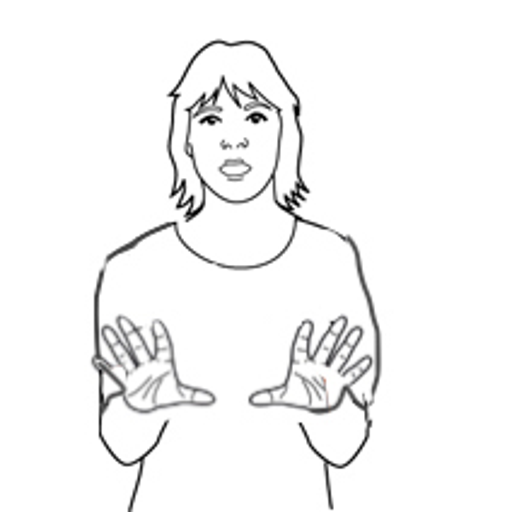

In [9]:
from utils.image_utils import load_size

img = load_size("/content/fangen.jpg")
img

In [10]:
prompt_gt_image_path = "/content/fangen.jpg"
prompt_image_path = "/content/fangen_frame14.jpg"
query_image_path = "/content/bonn_frame_0026.jpg"
output_path = "/content/drive/MyDrive/research/results"
seed = 42

config = RunConfig(
    output_path=Path(output_path),
    prompt_gt_image_path=Path(prompt_gt_image_path),
    prompt_image_path=Path(prompt_image_path),
    query_image_path=Path(query_image_path),
    seed=seed,
    load_latents=False,
    use_masked_adain = False,
    num_timesteps= 70,
    skip_steps=0,
)


In [11]:
from appearance_transfer_model import AppearanceTransferModel
from config import RunConfig, Range
from utils import latent_utils
from utils.latent_utils import load_latents_or_invert_images
import pyrallis
from diffusers.training_utils import set_seed


In [ ]:
pyrallis.dump(config, open(config.output_path / 'config.yaml', 'w'))
set_seed(config.seed)
model = AppearanceTransferModel(config)
latents_q, latents_v, latents_k , noise_q, noise_v, noise_k = load_latents_or_invert_images(model=model, cfg=config)
model.set_latents(latents_q,latents_k,latents_v)
model.set_noise(noise_q, noise_k, noise_v)



Loading Stable Diffusion model...


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:797: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

text_encoder/config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

You have disabled the safety checker for <class 'models.stable_diffusion.CrossImageAttentionStableDiffusionPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .
/usr/local/lib/python3.10/dist-packages/diffusers/configuration_utils.py:217: FutureWarning: It is deprecated to pass a pretrained model name or path to `from_config`.If you were trying to load a scheduler, please use <class 'diffusers.schedulers.scheduling_ddim.DDIMScheduler'>.from_pretrained(...) instead. Otherwise, please make sure to pass a configuration diction

Done.
Inverting images...


/content/utils/ddpm_inversion.py:44: FutureWarning: Accessing config attribute `in_channels` directly via 'FreeUUNet2DConditionModel' object attribute is deprecated. Please access 'in_channels' over 'FreeUUNet2DConditionModel's config object instead, e.g. 'unet.config.in_channels'.
  model.unet.in_channels,
/content/utils/ddpm_inversion.py:134: FutureWarning: Accessing config attribute `in_channels` directly via 'FreeUUNet2DConditionModel' object attribute is deprecated. Please access 'in_channels' over 'FreeUUNet2DConditionModel's config object instead, e.g. 'unet.config.in_channels'.
  model.unet.in_channels,
  3%|▎         | 2/70 [00:00<00:22,  2.97it/s]

In [ ]:

# pyrallis.dump(config, open(config.output_path / 'config.yaml', 'w'))
# set_seed(config.seed)
# model = AppearanceTransferModel(config)
# model.set_latents(latents_q,latents_k,latents_v)
# model.set_noise(noise_q, noise_k, noise_v)

Loading Stable Diffusion model...


/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:797: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

You have disabled the safety checker for <class 'models.stable_diffusion.CrossImageAttentionStableDiffusionPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .
/usr/local/lib/python3.10/dist-packages/diffusers/configuration_utils.py:217: FutureWarning: It is deprecated to pass a pretrained model name or path to `from_config`.If you were trying to load a scheduler, please use <class 'diffusers.schedulers.scheduling_ddim.DDIMScheduler'>.from_pretrained(...) instead. Otherwise, please make sure to pass a configuration diction

Done.


In [17]:
from run import run_appearance_transfer

In [34]:

print("Running appearance transfer...")
images = run_appearance_transfer(model=model, cfg=config)
print("Done.")

Running appearance transfer...


100%|██████████| 70/70 [01:33<00:00,  1.34s/it]


Done.


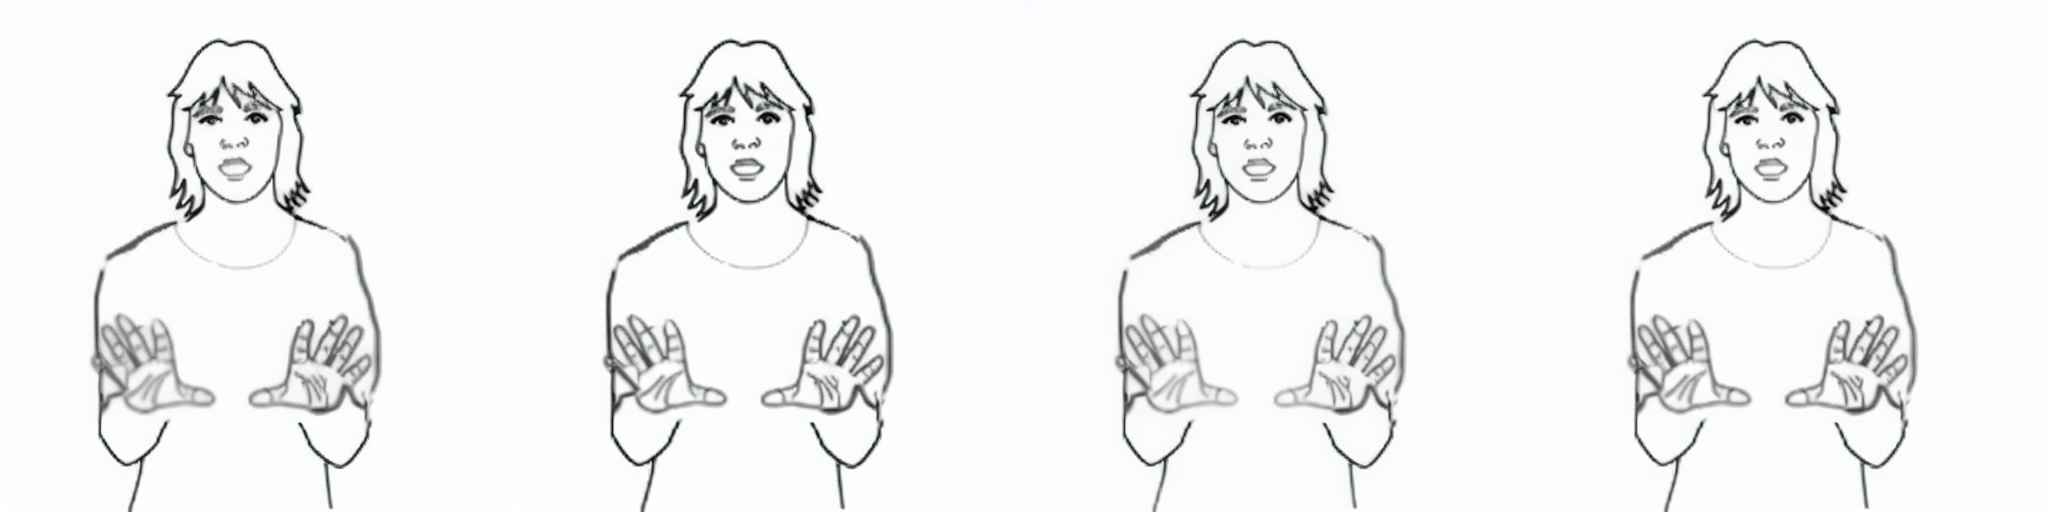

In [35]:
torch.cuda.empty_cache()
joined_images = Image.fromarray(np.concatenate(images, axis=1))
display(joined_images)

In [13]:
config

RunConfig(prompt_image_path=PosixPath('/content/000000196185_512.jpg'), prompt_gt_image_path=PosixPath('/content/000000196185_mask_512.jpg'), query_image_path=PosixPath('/content/000000196185_512.jpg'), domain_name='object', output_path=PosixPath('/content/results/query=000000196185_512--key=000000196185_512--value=000000196185_mask_512'), seed=42, prompt='A photo of a object', num_timesteps=70, use_masked_adain=False, cross_attn_64_range=Range(start=0, end=70), cross_attn_32_range=Range(start=0, end=70), adain_range=Range(start=0, end=100), swap_guidance_scale=3.5, contrast_strength=1.67, object_noun='object', load_latents=False, skip_steps=0)